<a href="https://colab.research.google.com/github/thanhtruongphan/HomeworkAI/blob/main/FuzzyLogic_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Họ tên sinh viên : Phan Thanh Trường**
## **Mã số sinh viên : 19146293**

In [ ]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=a6c1fe373a7137f7da871b25e0af1540986b8649d23030c2befc1c5f1fa7643c
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzzy

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
x = np.arange(30,81,1)

In [ ]:
x

array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])

## **1. use function skfuzzy.trimf**

In [ ]:
slow0 = fuzzy.trimf(x,[30,40,50])
slow1 = fuzzy.trimf(x,[40,50,60])
slow2 = fuzzy.trimf(x,[50,60,70])

In [ ]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

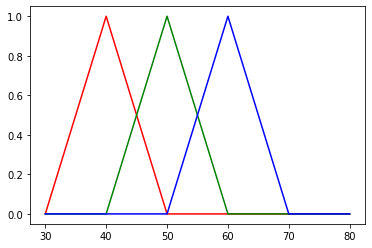

In [ ]:
plt.plot(x,slow0,'r',linewidth=1.5,label='Slow')
plt.plot(x,slow1,'g',linewidth=1.5,label='Slow')
plt.plot(x,slow2,'b',linewidth=1.5,label='Slow')

## **2. use function skfuzzy.trapmf**

In [ ]:
trap0 = fuzzy.trapmf(x,[30,40,40,50])
trap1 = fuzzy.trapmf(x,[40,50,50,60])
trap2 = fuzzy.trapmf(x,[50,60,60,70])

In [ ]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

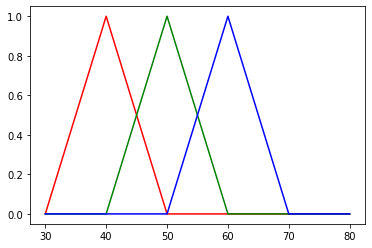

In [ ]:
plt.plot(x,trap0,'r',linewidth=1.5,label='Slow')
plt.plot(x,trap1,'g',linewidth=1.5,label='Slow')
plt.plot(x,trap2,'b',linewidth=1.5,label='Slow')

## **3. use fuzzy.gauss**

In [ ]:
gauss0 = fuzzy.gaussmf(x,40,4)
gauss1 = fuzzy.gaussmf(x,50,4)
gauss2 = fuzzy.gaussmf(x,60,4)

In [ ]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

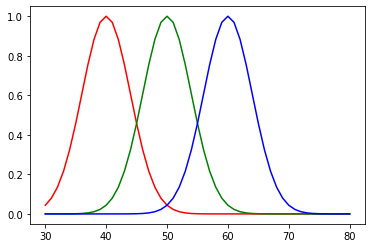

In [ ]:
plt.plot(x,gauss0,'r',linewidth=1.5,label='Slow')
plt.plot(x,gauss1,'g',linewidth=1.5,label='Slow')
plt.plot(x,gauss2,'b',linewidth=1.5,label='Slow')

# **4. Bai tap Tip=Food+Service**

In [ ]:
import numpy as np 
import skfuzzy as fuzzy 
from skfuzzy import control as ctrl

In [ ]:
food = ctrl.Antecedent(np.arange(0,11,1),'Food')
service = ctrl.Antecedent(np.arange(0,11,1),'Service')
tip = ctrl.Consequent(np.arange(10,31,1),'Tip')

# food['poor'] = fuzzy.trimf(food.universe,[0,0,5])
# food['medium'] = fuzzy.trimf(food.universe,[0,5,10])
# food['good'] = fuzzy.trimf(food.universe,[5,10,10])

# service['bad'] = fuzzy.trimf(service.universe,[0,0,5])
# service['avg'] = fuzzy.trimf(service.universe,[0,5,10])
# service['good'] = fuzzy.trimf(service.universe,[5,10,10])

# tip['litte'] = fuzzy.trimf(tip.universe,[10,10,15])
# tip['medium'] = fuzzy.trimf(tip.universe,[15,20,25])
# tip['much'] = fuzzy.trimf(tip.universe,[25,30,30])


food['poor'] = fuzzy.trimf(food.universe,[0,0,3])
food['medium'] = fuzzy.trimf(food.universe,[3,5,7])
food['good'] = fuzzy.trimf(food.universe,[7,10,10])

service['bad'] = fuzzy.trimf(service.universe,[0,0,3])
service['avg'] = fuzzy.trimf(service.universe,[3,5,7])
service['good'] = fuzzy.trimf(service.universe,[7,10,10])

tip['litte'] = fuzzy.trimf(tip.universe,[10,10,15])
tip['medium'] = fuzzy.trimf(tip.universe,[15,20,25])
tip['much'] = fuzzy.trimf(tip.universe,[25,30,30])


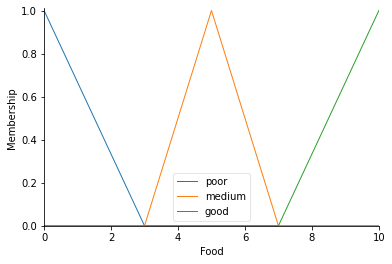

In [ ]:
food.view()

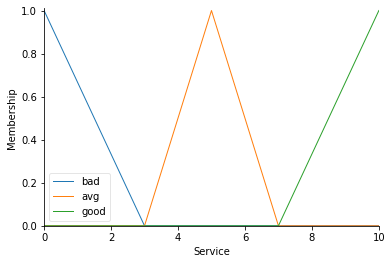

In [ ]:
service.view()

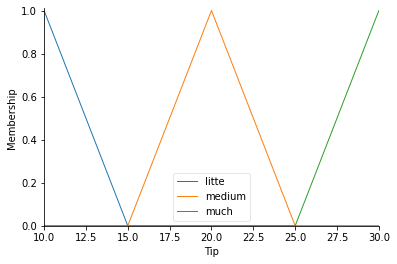

In [ ]:
tip.view()

In [ ]:
rule1 = ctrl.Rule(food['poor']&service['bad'],tip['litte'])
rule2 = ctrl.Rule(food['medium']&service['bad'],tip['litte'])
rule3 = ctrl.Rule(food['good']&service['bad'],tip['medium'])

rule4 = ctrl.Rule(food['poor']&service['avg'],tip['litte'])
rule5 = ctrl.Rule(food['medium']&service['avg'],tip['medium'])
rule6 = ctrl.Rule(food['good']&service['avg'],tip['much'])

rule7 = ctrl.Rule(food['poor']&service['good'],tip['medium'])
rule8 = ctrl.Rule(food['medium']&service['good'],tip['much'])
rule9 = ctrl.Rule(food['good']&service['good'],tip['much'])

27.79761904761905


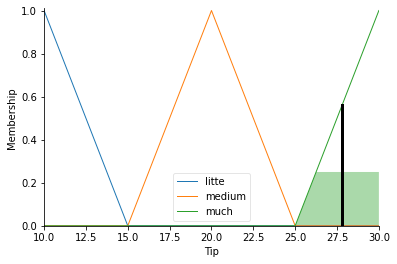

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Food'] = 6.5
tipping.input['Service'] = 9.8
tipping.compute()
print(tipping.output['Tip'])
tip.view(sim=tipping)

28.333333333333332


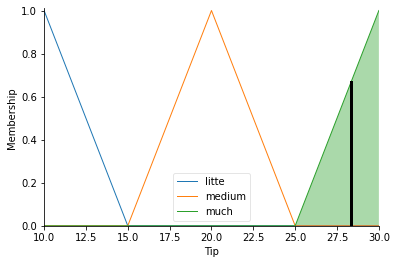

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Food'] = 10
tipping.input['Service'] = 10
tipping.compute()
print(tipping.output['Tip'])
tip.view(sim=tipping)

# **5. Power=Time+Rice**

In [ ]:
import numpy as np 
import skfuzzy as fuzzy 
from skfuzzy import control as ctrl

In [ ]:
rice = ctrl.Antecedent(np.arange(0.3,1.6,0.05),'Rice')
time = ctrl.Antecedent(np.arange(15,121,1),'Time')
power = ctrl.Consequent(np.arange(0,101,1),'Power')

rice['verylittle'] = fuzzy.trapmf(rice.universe,[0.3,0.3,0.35,0.6])
rice['little'] = fuzzy.trapmf(rice.universe,[0.2,0.3,0.6,0.9])
rice['medium'] = fuzzy.trimf(rice.universe,[0.6,0.9,1.2])
rice['much'] = fuzzy.trapmf(rice.universe,[0.9,1.2,1.4,1.5])
rice['verymuch'] = fuzzy.trapmf(rice.universe,[1.2,1.4,1.6,1.6])

time['veryFast'] = fuzzy.trapmf(time.universe,[15,15,20,30])
time['fast'] = fuzzy.trapmf(time.universe,[15,20,30,60])
time['medium'] = fuzzy.trimf(time.universe,[30,60,90])
time['low'] = fuzzy.trapmf(time.universe,[60,90,115,120])
time['veryLow'] = fuzzy.trapmf(time.universe,[90,115,120,120])

power['min'] = fuzzy.trapmf(power.universe,[0,0,5,25])
power['lower'] = fuzzy.trapmf(power.universe,[0,5,25,50])
power['normal'] = fuzzy.trimf(power.universe,[25,50,75])
power['higher'] = fuzzy.trapmf(power.universe,[50,75,95,100])
power['max'] = fuzzy.trapmf(power.universe,[75,95,100,100])

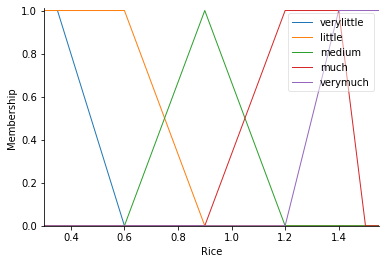

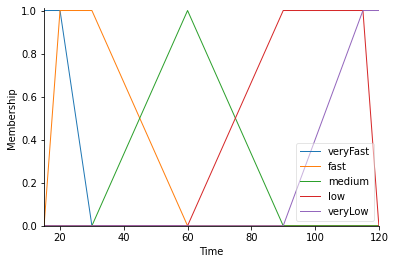

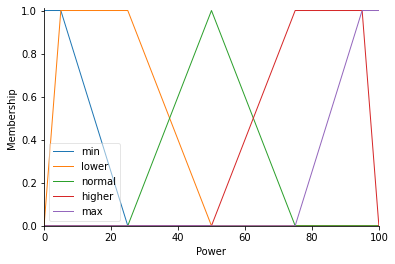

In [ ]:
rule1 = ctrl.Rule(rice['verylittle']&time['veryLow'],power['min'])
rule2 = ctrl.Rule(rice['verylittle']&time['low'],power['lower'])
rule3 = ctrl.Rule(rice['verylittle']&time['medium'],power['lower'])
rule4 = ctrl.Rule(rice['verylittle']&time['fast'],power['normal'])
rule5 = ctrl.Rule(rice['verylittle']&time['veryFast'],power['normal'])

rule6 = ctrl.Rule(rice['little']&time['veryLow'],power['lower'])
rule7 = ctrl.Rule(rice['little']&time['low'],power['lower'])
rule8 = ctrl.Rule(rice['little']&time['medium'],power['normal'])
rule9 = ctrl.Rule(rice['little']&time['fast'],power['normal'])
rule10 = ctrl.Rule(rice['little']&time['veryFast'],power['normal'])

rule11 = ctrl.Rule(rice['medium']&time['veryLow'],power['lower'])
rule12 = ctrl.Rule(rice['medium']&time['low'],power['normal'])
rule13 = ctrl.Rule(rice['medium']&time['medium'],power['normal'])
rule14 = ctrl.Rule(rice['medium']&time['fast'],power['higher'])
rule15 = ctrl.Rule(rice['medium']&time['veryFast'],power['higher'])

rule16 = ctrl.Rule(rice['much']&time['veryLow'],power['normal'])
rule17 = ctrl.Rule(rice['much']&time['low'],power['normal'])
rule18 = ctrl.Rule(rice['much']&time['medium'],power['higher'])
rule19 = ctrl.Rule(rice['much']&time['fast'],power['higher'])
rule20 = ctrl.Rule(rice['much']&time['veryFast'],power['higher'])

rule21 = ctrl.Rule(rice['verymuch']&time['veryLow'],power['normal'])
rule22 = ctrl.Rule(rice['verymuch']&time['low'],power['normal'])
rule23 = ctrl.Rule(rice['verymuch']&time['medium'],power['higher'])
rule24 = ctrl.Rule(rice['verymuch']&time['fast'],power['higher'])
rule25 = ctrl.Rule(rice['verymuch']&time['veryFast'],power['max'])
rice.view()
time.view()
power.view()

19.444444444444443


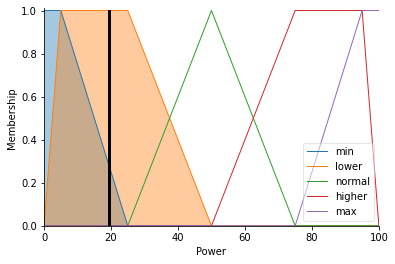

In [ ]:
powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['Rice'] = 0.2
powering.input['Time'] = 120
powering.compute()
print(powering.output['Power'])
power.view(sim=powering)